#  ATOC5860 Application Lab #3 - eigenfaces
##### Written by Dr. Vineel Yettella (ATOC Ph.D. 2018, now at Apple), with additional commenting from Prof. Kay (CU)
##### last updated February 22, 2023 - works with environment atoc5860env2023clean.yml

### LEARNING GOALS:

<font color='green'> Questions answered by Clairy Reiher (last answered on Thurs, Mar 2, 2022).
    
<font color='green'> Note: in the original python notebook downloaded from the ATOC5860 Google Drive, learning goals 2 and 3 were essentially the same, so I've deleted one of them.

1) Complete an EOF analysis using Singular Value Decomposition (SVD).

2) Provide a qualitative description of the results: What are the eigenvalue,the eigenvector, and the principal component?  What do they mean physically? What do you learn from each one about the space-time structure of the underlying dataset?
    
<font color='green'> The eigenvector of a matrix with a structure dimension and sampling dimension gives us an EOF of the matrix, and identifies a pattern that explains some portion of the variance in the matrix. Each eigenvector has a corresponding eigenvalue, from which we can determine the amount of variance explained by the corresponding eigenvector. Essentially, the eigenvalue measures the variance explained, while the eigenvector measures the direction in which the variance is explained. The principle component tells us how much a sample from the matrix (taken from along the sampling dimension) appears like the EOF pattern, or alternatively, how fitting a pattern may be for a given sample.

3) Reconstruct original data using a subset of EOFs: How many EOFs are needed to reconstruct faces?
    
<font color='green'> From a subjective perspective and using the method of trial and error, it seems like 150-200 EOFs are needed to pick up on most of the important features of a face.

### DATA and UNDERLYING SCIENCE MOTIVATION:  
In this notebook, you apply EOF analysis to a standard database for facial recognition: the At&t database. 

*“Our Database of Faces, (formerly 'The ORL Database of Faces'), contains a set of face images taken between April 1992 and April 1994 at the lab. The database was used in the context of a face recognition project carried out in collaboration with the Speech, Vision and Robotics Group of the Cambridge University Engineering Department.

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).”*

The goal is to think a bit “out of the box” of Atmospheric and Oceanic Sciences about potential applications for the methods you are learning in this class.  And also to think about some of the pitfalls of using statistics for facial recognition. Are the faces here representative of all faces?

### Non-exhaustive Questions to guide your analysis:  
1) Execute all code without making any modifications. What do the EOFs (spatial patterns) tell you?  What do the PCs tell you?  How do you interpret what you are finding?
    
<font color='green'> The EOFs tell us what patterns can be used to describe faces from the sample in the order of how much variance they describe among the faces. Each PC tells us how much a given face looks like a corresponding EOF pattern. In terms of interpretation, the EOFs describing the most amount of variance in the sample help us identify primary modes of variability among the different faces. These EOFs are ordered by the amount of variance they explain, and after a certain point in the ordered sequence, the EOFs explain so little variance that they may not be very useful for interpretation.

2) Reconstruct a face. How many EOFs do you need to reconstruct a face from the database?  Does it depend on the face that it used?
    
<font color='green'> I think this was already answered some by one of the questions above. Subjectively it seems that 150-200 EOFs are needed to capture most of the important features of a face. That number does vary from face to face. Some faces, especially those that deviate more than others from the sample average, really require 200 EOFs to accurately capture most of the facial features appropriately.

3) Food for thought: The database contains 75% white men.  How do you think this database sampling limitation impacts the utility of the database for subjects who are not white men?  What are some parallels that you might draw when analyzing atmospheric and oceanic sciences datasets?  Hint: Think about the limitations of extrapolation beyond the domain where you have data.
    
<font color='green'> Essentially, these EOFs cannot be regarded as descriptive for faces belonging to women and people of color. These EOFs only apply to the variance among populations of largely white men. The corresponding idea for atmospheric and oceanic sciences is that the dataset which we apply EOFs to needs to be reasonably large and needs to sample from a reasonably diverse set of the population if we intend to find a set of EOFs that can be later applied to describe the population.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load faces. Adapted from the AT&T face database
att_faces = np.load('att_faces.npy')
#There are about 400 faces that are 112 pixels x 92 pixels
height, width, n_faces = att_faces.shape
print((height, width, n_faces))

(112, 92, 400)


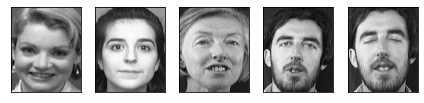

In [3]:
#print a few faces from the database - Look at your data!!
n = 5
fig, axs = plt.subplots(1, n)

random_face_inds = np.random.choice(np.arange(n_faces), n, replace=False)
for i, ax in enumerate(axs):
    ax.imshow(att_faces[:, :, random_face_inds[i]], cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

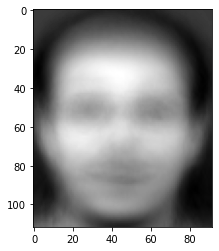

In [4]:
#Print the average face
average_face = np.mean(att_faces, axis = 2);
plt.imshow(average_face, cmap = 'gray');

In [5]:
#Construct the data matrix for EOF analysis
#The rows will represent the sampling dimension (different faces) and the
#columns will represent the structure dimension (individual pixels)
print('Original shape: '+str(att_faces.shape))
data_matrix = np.reshape(att_faces, (height*width, n_faces)).T
print('New shape: '+str(data_matrix.shape))

#Construct anomaly matrix by removing the average face, i.e., 
#by removing the column means from each column of the data_matrix
anomaly_matrix = data_matrix - np.mean(data_matrix, axis=0)
#anomaly_matrix = anomaly_matrix/np.std(anomaly_matrix, axis=0)

#Apply SVD to find the EOFs and their corresponding eigenvalues
#This function outputs 400 EOF patterns, which each have a corresponding
#eigenvalue

#The eofs array below is structured so that:
#Each column of eofs correponds to a different EOF pattern (aka eigenvector),
#and the rows correspond to values for a given EOF pattern/eigenvector
#For example, eofs[:,0] gives the 1st eigenvector (which contains all the values for
#the first EOF pattern compressed into a single vector)

#s contains the square root of each eigenvalue that corresponds to a matching
#eigenvector

[eofs, s, v] = np.linalg.svd(anomaly_matrix.T, full_matrices=False)
print('Shape of resulting EOFs: '+str(eofs.shape))

#Use the eigenvalues to compute the variance attributable to each EOF
eigenvals = np.square(s)
variance_explained = eigenvals/np.sum(eigenvals)

Original shape: (112, 92, 400)
New shape: (400, 10304)
Shape of resulting EOFs: (10304, 400)


In [6]:
np.shape(v)

(400, 400)

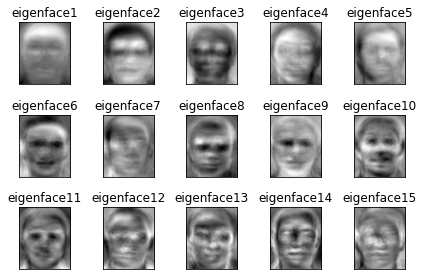

In [7]:
#Plot the top 15 EOF patterns (a.k.a eigenfaces)
fig, axs = plt.subplots(3, 5)

for i, ax in enumerate(np.reshape(axs, 15)):
    eigenface = np.reshape(eofs[:, i], [height, width])
    ax.imshow(eigenface, cmap='gray')
    ax.set_title('eigenface' + str(i+1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

Text(0, 0.5, 'Percentage of Variance Explained')

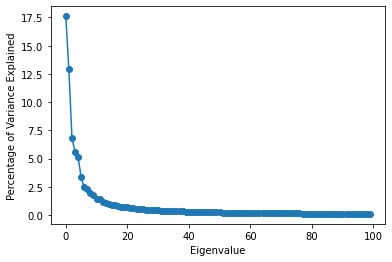

In [8]:
#Plot variance explained by each eigenface
plt.plot(variance_explained[0:100]*100, marker='o')
plt.xlabel('Eigenvalue')
plt.ylabel('Percentage of Variance Explained')

(400, 400)
(150,)
(112, 92)


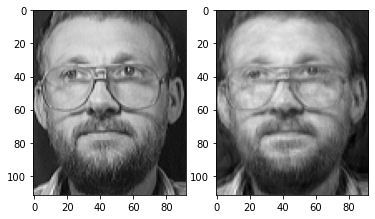

In [23]:
#Project the faces onto the eigenfaces
weights = np.dot(anomaly_matrix, eofs)
print(weights.shape)

#Choose a face to reconstruct
face_num = 130 #0 to 389
original_face = att_faces[:, :, face_num]

#choose number of weights to reconstruct face
weights_num = 150
face_weights = weights[face_num, 0:weights_num]
print(face_weights.shape)
reconstructed_face = np.dot(eofs[:, 0:weights_num], face_weights)

#At this point, the reconstructed face is an anomaly face with the average face removed. 
#Add back the average face to get the original face
reconstructed_face = np.reshape(reconstructed_face, (height, width)) + average_face
print(reconstructed_face.shape)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(original_face, cmap='gray');
axs[1].imshow(reconstructed_face, cmap='gray');

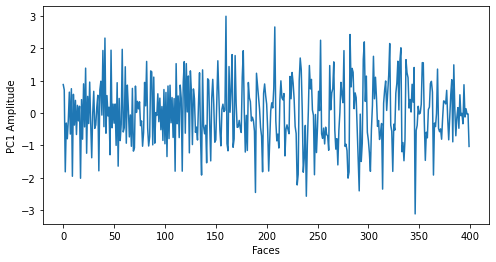

In [25]:
#Plot PC1
eofnum = 1
pc1_unstandardized = v[:,eofnum-1]
pc1 = (pc1_unstandardized-np.mean(pc1_unstandardized))/np.std(pc1_unstandardized)

plt.figure(figsize=(8,4))
plt.plot(pc1)
plt.ylabel('PC1 Amplitude')
plt.xlabel('Faces')
plt.show()